In [12]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Data wrangling

### customerID is not a usefule column so delete it

In [41]:
df.shape


(7043, 20)

In [27]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4851,2055-PDADH,Female,1,No,No,3,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.40,204.7,Yes
2506,8735-SDUFN,Female,1,Yes,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.30,1778.7,No
5936,9418-RUKPH,Female,0,Yes,Yes,38,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.95,756.4,No
4844,5177-RVZNU,Female,0,No,Yes,37,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.30,755.4,No
505,5609-CEBID,Female,1,No,No,20,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,94.10,1782.4,Yes


In [29]:
df.drop('customerID', axis='columns',inplace=True)

In [32]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [34]:
## TotalCharges type is object, but it has to be a number
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [59]:
df_clean = df[df.TotalCharges!=' ']

In [60]:
print(df.shape)
print(df_clean.shape)

(7043, 20)
(7032, 20)


In [61]:
## convert to number
df_clean.TotalCharges = pd.to_numeric(df_clean.TotalCharges)

In [48]:
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

### check if there's any other column which has empty space as a value

In [62]:
df_clean[(df_clean.TotalCharges==' ') | (df_clean.gender==' ')| (df_clean.SeniorCitizen ==' ')| (df_clean.Partner ==' ')| (df_clean.Dependents          ==' ')| (df_clean.tenure              ==' ')| (df_clean.PhoneService        ==' ')| (df_clean.MultipleLines       ==' ')| (df_clean.InternetService     ==' ')| (df_clean.OnlineSecurity      ==' ')| (df_clean.OnlineBackup        ==' ')| (df_clean.DeviceProtection          ==' ')| (df_clean.OnlineSecurity      ==' ')| (df_clean.StreamingTV               ==' ')| (df_clean.StreamingMovies           ==' ')| (df_clean.TechSupport               ==' ')| (df_clean.PaperlessBilling          ==' ')| (df_clean.PaymentMethod             ==' ')| (df_clean.Contract                  ==' ')| (df_clean.MonthlyCharges            ==' ')| (df_clean.TotalCharges                    ==' ')| (df_clean.Churn                           ==' ')].shape

(0, 20)

### Let's perform the EDA and understand the data more thoroughly

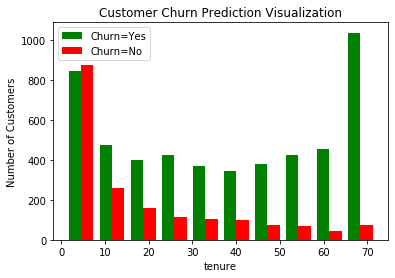

In [69]:
## histograms with tenured customers

tenure_churn_no = df_clean[df_clean.Churn=='No'].tenure
tenure_churn_yes = df_clean[df_clean.Churn=='Yes'].tenure


plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([tenure_churn_no, tenure_churn_yes], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
